In [95]:
import numpy as np
import pandas as pd

In [96]:


df = pd.read_csv("spam.csv", encoding='latin1')


In [97]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5249,ham,"K I'm leaving soon, be there a little after 9",NaN,NaN,NaN
1404,ham,Actually getting ready to leave the house.,NaN,NaN,NaN
2143,ham,You stayin out of trouble stranger!!saw Dave t...,NaN,NaN,NaN
3019,ham,I thank you so much for all you do with selfle...,NaN,NaN,NaN
806,ham,"sure, but make sure he knows we ain't smokin yet",NaN,NaN,NaN


In [98]:
df.shape

(5572, 5)

## Data Cleaning

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [100]:
#Drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [101]:
df.sample(5)

,v1,v2
5287,ham,Hey ! Don't forget ... You are MINE ... For ME...
5541,ham,Yeah it's jus rite...
3777,ham,Once a fishrman woke early in d mrng. It was v...
2010,ham,Dunno lei... I thk mum lazy to go out... I nev...
5338,ham,So when do you wanna gym?


In [102]:
# Rename the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4012,ham,Ok.
4797,ham,Just come home. I don't want u to be miserable
2566,ham,You in your room? I need a few
875,spam,"Shop till u Drop, IS IT YOU, either 10K, 5K, å..."
1779,spam,"Loan for any purpose å£500 - å£75,000. Homeown..."


In [103]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [104]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [105]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [106]:
df.duplicated().sum()

403

In [107]:
#remove duplicats
df=df.drop_duplicates(keep='first')

In [108]:
df.duplicated().sum()

0

In [109]:
df.shape

(5169, 2)

## EDA


In [110]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

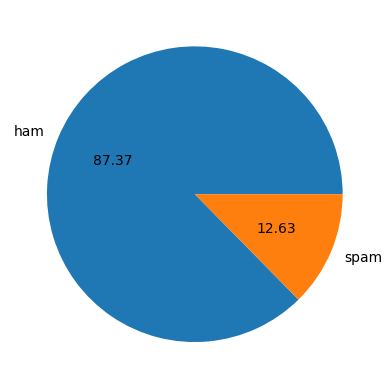

In [111]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [112]:
#Data is not balanced

In [113]:
import nltk

In [114]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [115]:
df['num_characters']=df['text'].apply(len)

In [116]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [117]:
#Num of words
df['num_of_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [118]:
df.head()

,target,text,num_characters,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [119]:
#Num of sentences
df['num_of_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [120]:
df.head()

,target,text,num_characters,num_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [121]:
df[['num_characters','num_of_words','num_of_sentences']].describe()

,num_characters,num_of_words,num_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [122]:
#ham messages description
df[df['target']==0][['num_characters','num_of_words','num_of_sentences']].describe()

,num_characters,num_of_words,num_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [123]:
#spam messages description
df[df['target']==1][['num_characters','num_of_words','num_of_sentences']].describe()

,num_characters,num_of_words,num_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [124]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

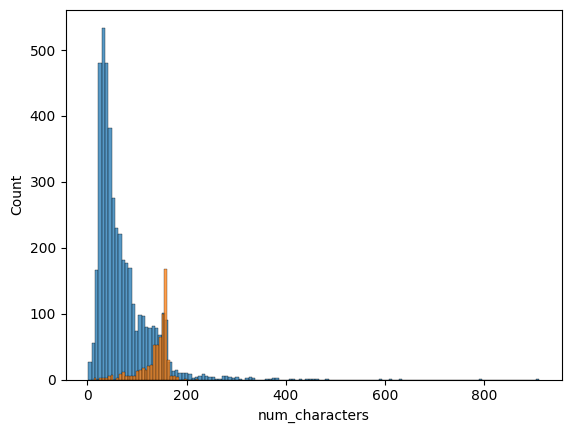

In [125]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'])

<Axes: xlabel='num_of_words', ylabel='Count'>

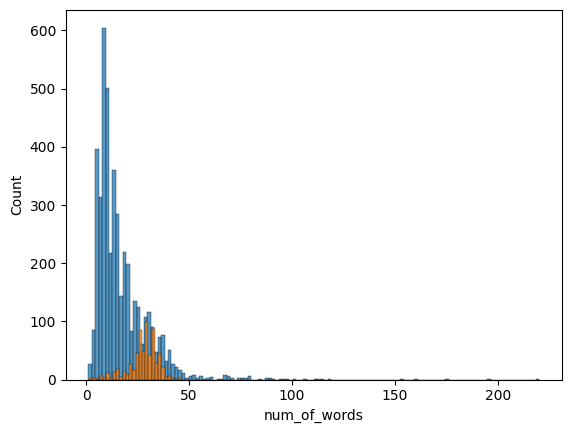

In [126]:
sns.histplot(df[df['target']==0]['num_of_words'])
sns.histplot(df[df['target']==1]['num_of_words'])

<Axes: xlabel='num_of_sentences', ylabel='Count'>

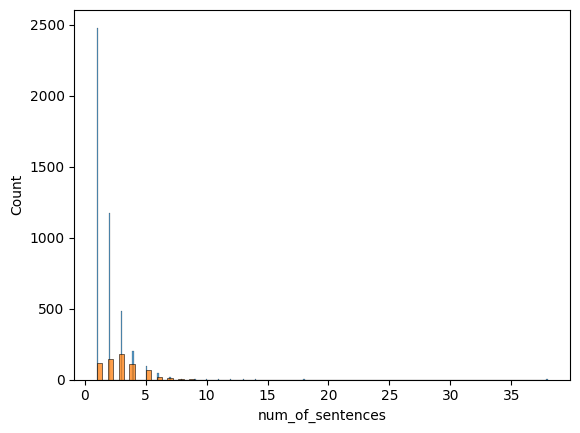

In [127]:
sns.histplot(df[df['target']==0]['num_of_sentences'])
sns.histplot(df[df['target']==1]['num_of_sentences'])

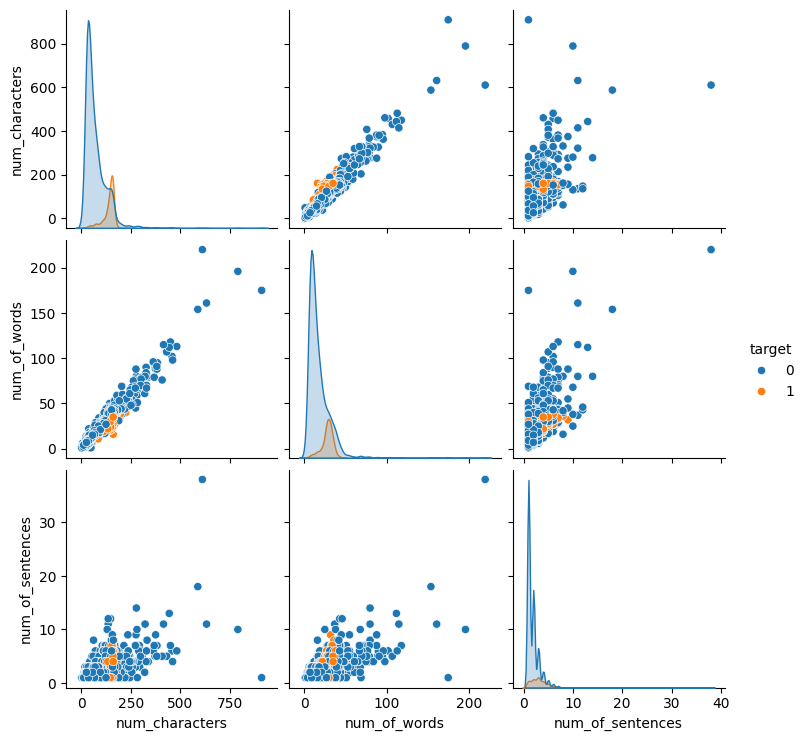

In [128]:
sns.pairplot(df,hue='target')

In [129]:

numeric_df = df.select_dtypes(include='number')  # Select only numeric columns
correlation_matrix = numeric_df.corr()  # Compute correlation matrix


<Axes: >

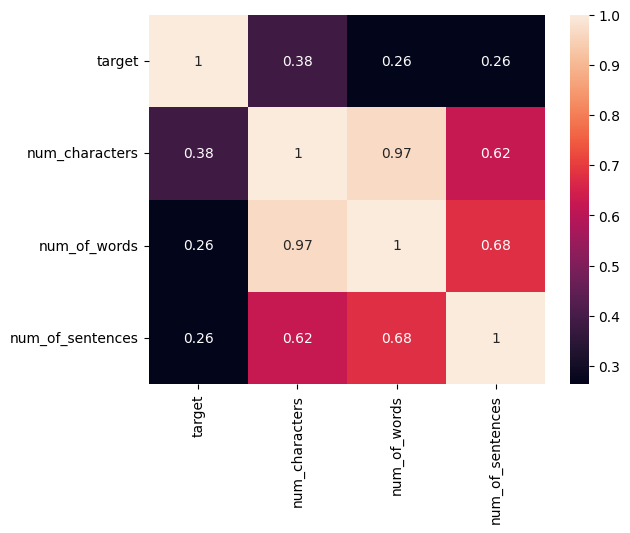

In [130]:
sns.heatmap(correlation_matrix,annot=True)

## Data Preprocessing

In [131]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)

In [132]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [133]:
transform_text("Hi how Are %% You")

'hi'

In [134]:
transform_text("Hi my name is Ankit Gaidhar I am learning NLP !!!!!")

'hi name ankit gaidhar learn nlp'

In [135]:
df['text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [136]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [137]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [138]:
transform_text("I love yt lectures on Machine Learning how about you")

'love yt lectur machin learn'

In [139]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [140]:
transform_text("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [141]:
df['transformed_text']=df['text'].apply(transform_text)

In [142]:
df.head()

,target,text,num_characters,num_of_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [143]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [144]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

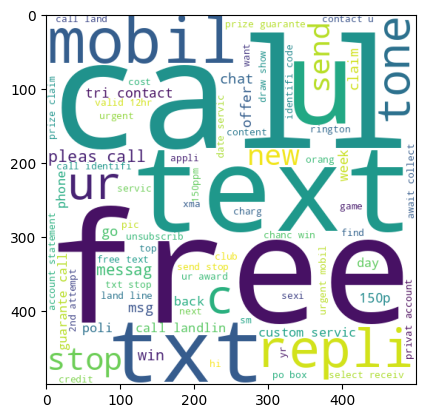

In [145]:
plt.imshow(spam_wc)

In [146]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

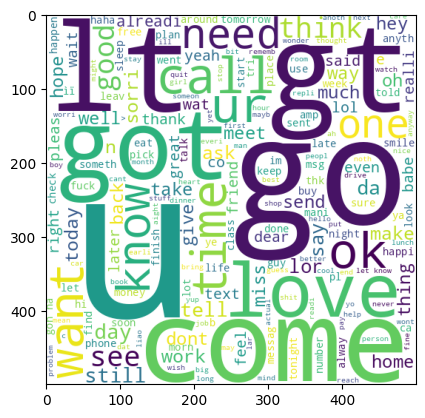

In [147]:
plt.imshow(spam_wc)

In [148]:
df.head()

,target,text,num_characters,num_of_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [149]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [150]:
len(spam_corpus)

9939

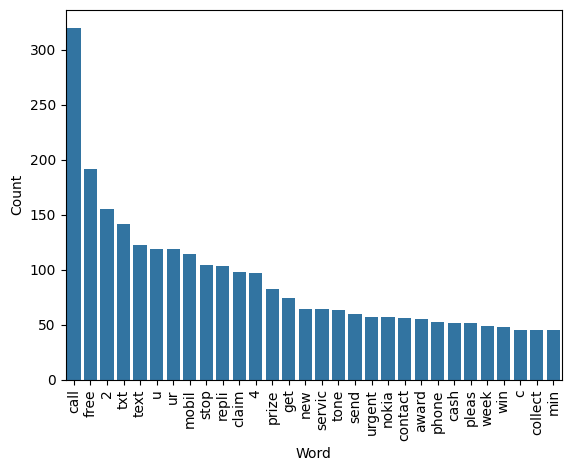

In [151]:
from collections import Counter
spam_counts = Counter(spam_corpus).most_common(30)
spam_df = pd.DataFrame(spam_counts, columns=['Word', 'Count'])

sns.barplot(x='Word', y='Count', data=spam_df)
plt.xticks(rotation='vertical')
plt.show()


In [152]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [153]:
len(ham_corpus)

35404

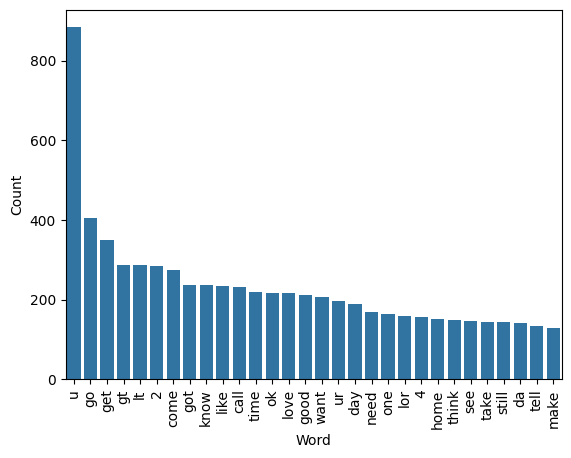

In [154]:
from collections import Counter
ham_counts = Counter(ham_corpus).most_common(30)
ham_df = pd.DataFrame(ham_counts, columns=['Word', 'Count'])

sns.barplot(x='Word', y='Count', data=ham_df)
plt.xticks(rotation='vertical')
plt.show()


##Model Building

Using CountVectorizer

In [251]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [156]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [157]:
X.shape

(5169, 6708)

In [158]:
y=df['target'].values

In [159]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [162]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [163]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [164]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred1))
print("Confusion Matrix: ",confusion_matrix(y_test,y_pred1))
print("Precision Score: ",precision_score(y_test,y_pred1))

Accuracy Score:  0.8800773694390716
Confusion Matrix:  [[792 104]
 [ 20 118]]
Precision Score:  0.5315315315315315


In [165]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred2))
print("Confusion Matrix: ",confusion_matrix(y_test,y_pred2))
print("Precision Score: ",precision_score(y_test,y_pred2))

Accuracy Score:  0.9642166344294004
Confusion Matrix:  [[871  25]
 [ 12 126]]
Precision Score:  0.8344370860927153


In [166]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred3))
print("Confusion Matrix: ",confusion_matrix(y_test,y_pred3))
print("Precision Score: ",precision_score(y_test,y_pred3))

Accuracy Score:  0.9700193423597679
Confusion Matrix:  [[893   3]
 [ 28 110]]
Precision Score:  0.9734513274336283


Using TFIDF Vectorizer

In [252]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [190]:
#from sklearn.preprocessing import MinMaxScaler
#scaler=MinMaxScaler()
#X=scaler.fit_transform(X)

In [219]:
#X=np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [253]:
X.shape

(5169, 3000)

In [254]:
y=df['target'].values

In [255]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [256]:
from sklearn.model_selection import train_test_split

In [257]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [258]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [259]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [260]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred1))
print("Confusion Matrix: ",confusion_matrix(y_test,y_pred1))
print("Precision Score: ",precision_score(y_test,y_pred1))

Accuracy Score:  0.8694390715667312
Confusion Matrix:  [[788 108]
 [ 27 111]]
Precision Score:  0.5068493150684932


In [261]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred2))
print("Confusion Matrix: ",confusion_matrix(y_test,y_pred2))
print("Precision Score: ",precision_score(y_test,y_pred2))

Accuracy Score:  0.9709864603481625
Confusion Matrix:  [[896   0]
 [ 30 108]]
Precision Score:  1.0


In [262]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test,y_pred3))
print("Confusion Matrix: ",confusion_matrix(y_test,y_pred3))
print("Precision Score: ",precision_score(y_test,y_pred3))

Accuracy Score:  0.9835589941972921
Confusion Matrix:  [[895   1]
 [ 16 122]]
Precision Score:  0.991869918699187


Using All Algorithms

In [230]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Sample data loading (replace with your actual data)
# X, y = load_your_data()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classifiers with specific configurations
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary' if len(set(y_test)) == 2 else 'macro')
    return accuracy, precision

# Lists to store the accuracy and precision scores
accuracy_scores = []
precision_scores = []

# Train and evaluate each classifier
for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print(f"For: {name}")
    print(f"Accuracy: {current_accuracy}")
    print(f"Precision: {current_precision}")
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For: SVC
Accuracy: 0.8597678916827853
Precision: 0.0
For: KN
Accuracy: 0.9284332688588007
Precision: 0.784
For: NB
Accuracy: 0.941972920696325
Precision: 0.9885057471264368
For: DT
Accuracy: 0.9303675048355899
Precision: 0.8230088495575221
For: LR
Accuracy: 0.9555125725338491
Precision: 0.9090909090909091
For: RF
Accuracy: 0.971953578336557
Precision: 0.9833333333333333
For: AdaBoost
Accuracy: 0.9661508704061895
Precision: 0.9104477611940298
For: BgC
Accuracy: 0.9613152804642167
Precision: 0.8571428571428571
For: ETC
Accuracy: 0.9748549323017408
Precision: 0.9612403100775194
For: GBDT
Accuracy: 0.9506769825918762
Precision: 0.9272727272727272
For: xgb
Accuracy: 0.9690522243713733
Precision: 0.937984496124031


In [263]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [264]:
performance_df

,Algorithm,Accuracy,Precision
2,NB,0.941973,0.988506
5,RF,0.971954,0.983333
8,ETC,0.974855,0.961240
10,xgb,0.969052,0.937984
9,GBDT,0.950677,0.927273
6,AdaBoost,0.966151,0.910448
4,LR,0.955513,0.909091
7,BgC,0.961315,0.857143
3,DT,0.930368,0.823009
1,KN,0.928433,0.784000


In [233]:
performance_df1=pd.melt(performance_df,id_vars='Algorithm')

In [234]:
performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.941973
1,RF,Accuracy,0.971954
2,ETC,Accuracy,0.974855
3,xgb,Accuracy,0.969052
4,GBDT,Accuracy,0.950677
5,AdaBoost,Accuracy,0.966151
6,LR,Accuracy,0.955513
7,BgC,Accuracy,0.961315
8,DT,Accuracy,0.930368
9,KN,Accuracy,0.928433


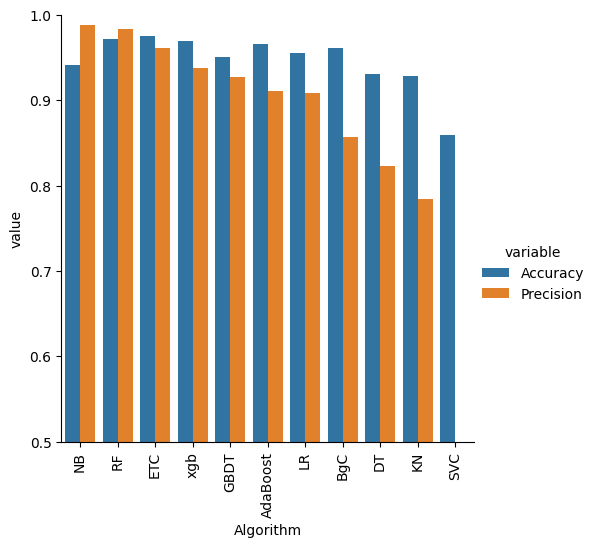

In [235]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

## Model Improvement

In [236]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores})

In [237]:
new_df=performance_df.merge(temp_df,on='Algorithm')

In [238]:
new_df_scaled=new_df.merge(temp_df,on='Algorithm')

In [239]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y
0,NB,0.941973,0.988506,0.941973,0.988506,0.941973,0.988506
1,RF,0.971954,0.983333,0.971954,0.983333,0.971954,0.983333
2,ETC,0.974855,0.961240,0.974855,0.961240,0.974855,0.961240
3,xgb,0.969052,0.937984,0.969052,0.937984,0.969052,0.937984
4,GBDT,0.950677,0.927273,0.950677,0.927273,0.950677,0.927273
5,AdaBoost,0.966151,0.910448,0.966151,0.910448,0.966151,0.910448
6,LR,0.955513,0.909091,0.955513,0.909091,0.955513,0.909091
7,BgC,0.961315,0.857143,0.961315,0.857143,0.961315,0.857143
8,DT,0.930368,0.823009,0.930368,0.823009,0.930368,0.823009
9,KN,0.928433,0.784000,0.928433,0.784000,0.928433,0.784000


In [240]:
tmp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores})

In [241]:
new_df_scaled.merge(tmp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,NB,0.941973,0.988506,0.941973,0.988506,0.941973,0.988506,0.941973,0.988506
1,RF,0.971954,0.983333,0.971954,0.983333,0.971954,0.983333,0.971954,0.983333
2,ETC,0.974855,0.961240,0.974855,0.961240,0.974855,0.961240,0.974855,0.961240
3,xgb,0.969052,0.937984,0.969052,0.937984,0.969052,0.937984,0.969052,0.937984
4,GBDT,0.950677,0.927273,0.950677,0.927273,0.950677,0.927273,0.950677,0.927273
5,AdaBoost,0.966151,0.910448,0.966151,0.910448,0.966151,0.910448,0.966151,0.910448
6,LR,0.955513,0.909091,0.955513,0.909091,0.955513,0.909091,0.955513,0.909091
7,BgC,0.961315,0.857143,0.961315,0.857143,0.961315,0.857143,0.961315,0.857143
8,DT,0.930368,0.823009,0.930368,0.823009,0.930368,0.823009,0.930368,0.823009
9,KN,0.928433,0.784000,0.928433,0.784000,0.928433,0.784000,0.928433,0.784000


In [242]:
from tkinter.constants import S
#Voting Classifier
svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier

In [243]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [244]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [245]:
y_pred=voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9410058027079303
Precision 1.0


In [246]:
#Applying Stacking
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [247]:
from sklearn.ensemble import StackingClassifier

In [248]:
clf=StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [249]:
clf.fit(X_train,y_train)

StackingClassifier(estimators=[('svm',
                                SVC(gamma=1.0, kernel='sigmoid',
                                    probability=True)),
                               ('nb', MultinomialNB()),
                               ('et',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2))],
                   final_estimator=RandomForestClassifier())

In [250]:
y_pred=clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.971953578336557
Precision 0.8972602739726028


In [265]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))